In [6]:
import fsemu
import numpy as np
import time


In [ ]:
circ = [('H',(0,)), ('CNOT', (0,1)), ('CNOT', (0,2)), ('CNOT', (0,3))]
final  = fsemu.simulate(4, circ)
fsemu.sample(final, 1000)

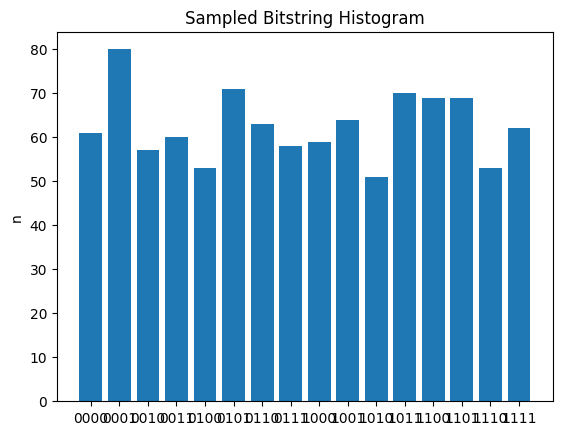

In [5]:
circ = [('H',(i,)) for i in range(4)]
final  = fsemu.simulate(4, circ)
fsemu.sample(final, 1000)

In [15]:
data = [[], []]
for n in range(1000,100000, 1000):
    circ = [('H',(0,)) for i in range(n)]
    start_time = time.time()
    final  = fsemu.simulate(4, circ)
    end_time = time.time()
    data[0].append(n)
    data[1].append(end_time - start_time)

In [16]:
import matplotlib.pyplot as plt

In [24]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(data[0], data[1])
print(f"Slope: {slope}, Intercept: {intercept}, R^2: {r_value**2}")
def linear_fit(x):
    return slope * x + intercept

Slope: 3.037322520619936e-05, Intercept: 0.11081330492628738, R^2: 0.9870721772715503


In [19]:
import pickle

with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)

In [20]:
with open('data.pkl', 'rb') as f:
    data2 = pickle.load(f)

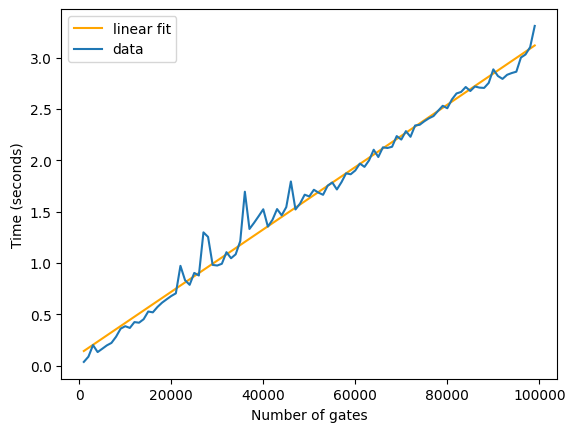

In [31]:
plt.plot(data2[0], linear_fit(np.array(data2[0])), label='linear fit', color='orange')

plt.plot(data2[0], data2[1], label = 'data')
plt.xlabel('Number of gates')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

In [9]:
print(circ)

[('H', (0,)), ('H', (1,)), ('H', (2,)), ('H', (3,)), ('H', (4,)), ('H', (5,)), ('H', (6,)), ('H', (7,)), ('H', (8,)), ('H', (9,)), ('H', (10,)), ('H', (11,)), ('H', (12,)), ('H', (13,)), ('H', (14,)), ('H', (15,)), ('H', (16,)), ('H', (17,)), ('H', (18,)), ('H', (19,)), ('H', (20,)), ('H', (21,)), ('H', (22,)), ('H', (23,)), ('H', (24,)), ('H', (25,)), ('H', (26,)), ('H', (27,)), ('H', (28,)), ('H', (29,)), ('H', (30,)), ('H', (31,)), ('H', (32,)), ('H', (33,)), ('H', (34,)), ('H', (35,)), ('H', (36,)), ('H', (37,)), ('H', (38,)), ('H', (39,)), ('H', (40,)), ('H', (41,)), ('H', (42,)), ('H', (43,)), ('H', (44,)), ('H', (45,)), ('H', (46,)), ('H', (47,)), ('H', (48,)), ('H', (49,)), ('H', (50,)), ('H', (51,)), ('H', (52,)), ('H', (53,)), ('H', (54,)), ('H', (55,)), ('H', (56,)), ('H', (57,)), ('H', (58,)), ('H', (59,)), ('H', (60,)), ('H', (61,)), ('H', (62,)), ('H', (63,)), ('H', (64,)), ('H', (65,)), ('H', (66,)), ('H', (67,)), ('H', (68,)), ('H', (69,)), ('H', (70,)), ('H', (71,)), (

In [5]:
zerostate = fsemu.init_state(4)

In [6]:
fsemu.expectation_value(final, [('Z', (0,)), ('Z', (3,))])

np.float64(0.9999999999999998)

In [7]:
fsemu.get_zcorrelator(final, 0,3)

np.float64(0.9999999999999998)

In [10]:
fsemu.sample_state(final)

(1, 1, 1, 1)

In [2]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8, 9], [10, 11, 12]])

result = np.multiply(a, b)
print(result)

[[ 7 16 27]
 [40 55 72]]


In [12]:
test1 = np.array([[[1,1],[1,1]],[[1,1],[1,1]]])


In [13]:
test1.shape

(2, 2, 2)

In [1]:
import mps
import numpy as np
import fsemu


In [2]:
zerostate = mps.init_state_zero(3)

In [3]:
result = mps.apply_2q_gate_nn_Tebd(zerostate, (0,1), 'CNOT')

(2, 2) (4, 2)


ValueError: cannot reshape array of size 4 into shape (2,2,2)

In [15]:
mps.as_array(result)

array([[[[1., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[1., 0.],
         [0., 0.]]]])

In [14]:
result

[array([[[ 1.,  0.],
         [-0.,  1.]]]),
 array([[[-0.70710678, -0.        , -0.        , -0.70710678],
         [ 0.        ,  1.        , -0.        , -0.        ]],
 
        [[ 0.        ,  0.        ,  1.        , -0.        ],
         [-0.70710678,  0.        ,  0.        ,  0.70710678]]]),
 array([[[-1.41421356,  0.        ],
         [ 0.        ,  0.        ]],
 
        [[ 0.        ,  0.        ],
         [ 0.        ,  0.        ]],
 
        [[ 0.        ,  0.        ],
         [ 0.        ,  0.        ]],
 
        [[ 0.        ,  0.        ],
         [ 0.        ,  0.        ]]]),
 array([[[1.],
         [0.]],
 
        [[0.],
         [0.]]])]

In [2]:
randomstate = mps.init_state_random(4, 2)
zerostate = mps.init_state_zero(4)
zerostate = mps.apply_1q_gate(zerostate, 0, 'X')

In [ ]:

zerostate = mps.apply_2q_gate_nn(zerostate, (1,2), 'CNOT')

print(zerostate)

[array([[[ 1.,  0.],
        [-0.,  1.]]]), array([[[0.],
        [0.]],

       [[0.],
        [1.]]]), array([[[1.],
        [0.]]]), array([[[1.],
        [0.]]])]


In [4]:
mps.as_array(zerostate).shape

(2, 2, 2, 2)

In [5]:
results = mps.flatten(zerostate)

In [6]:
results

{'0000': np.float64(0.0),
 '0001': np.float64(0.0),
 '0010': np.float64(0.0),
 '0011': np.float64(0.0),
 '0100': np.float64(0.0),
 '0101': np.float64(0.0),
 '0110': np.float64(0.0),
 '0111': np.float64(0.0),
 '1000': np.float64(0.0),
 '1001': np.float64(0.0),
 '1010': np.float64(0.0),
 '1011': np.float64(0.0),
 '1100': np.float64(1.0),
 '1101': np.float64(0.0),
 '1110': np.float64(0.0),
 '1111': np.float64(0.0)}

$$\Psi_{i_1 i_2 i_3 i_4}$$

In [12]:
zerostate = mps.apply_1q_gate(zerostate, 2, mps.gates['Y'])

In [13]:
zerostate

[array([[[1.],
         [0.]]]),
 array([[[1.],
         [0.]]]),
 array([[[0.+0.70710678j],
         [0.-0.70710678j]]]),
 array([[[1.],
         [0.]]])]

In [3]:
flatmps = mps.give_flat(zerostate)

In [4]:
flatfs = fsemu.init_state(4)

In [5]:
print(flatmps)
print(flatfs)

[[[[1. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]]
[[[[1. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]


 [[[0. 0.]
   [0. 0.]]

  [[0. 0.]
   [0. 0.]]]]


In [6]:
a = np.array([1,2])
b= np.array([3,4])


In [11]:
np.concatenate([a, b])

array([1, 2, 3, 4])